After SMOTE: stroke
0    3786
1    3786
Name: count, dtype: int64
Accuracy: 0.7482447342026078
ROC AUC: 0.8389862724392819
[[706 241]
 [ 10  40]]
              precision    recall  f1-score   support

           0       0.99      0.75      0.85       947
           1       0.14      0.80      0.24        50

    accuracy                           0.75       997
   macro avg       0.56      0.77      0.55       997
weighted avg       0.94      0.75      0.82       997



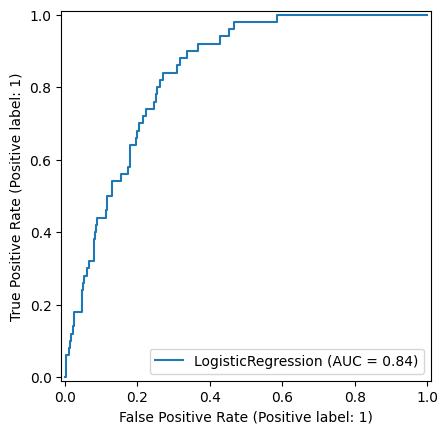

['model_artifacts/feature_columns.joblib']

In [ ]:
# 1. IMPORT
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, RocCurveDisplay
from imblearn.over_sampling import SMOTE
import joblib
import os

# 2. LOAD DATA
df = pd.read_csv('/content/brain_stroke.csv')

if 'id' in df.columns:
    df = df.drop(columns=['id'])

# 3. IMPUTASI BMI
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())

# 4. ONE HOT ENCODING
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# 5. FITUR & TARGET
X = df.drop('stroke', axis=1)
y = df['stroke']

# 6. SPLIT 80:20 STRATIFIED
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 7. NORMALISASI (StandardScaler sesuai jurnal)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 8. HANDLE IMBALANCE (SMOTE sesuai jurnal)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

print("After SMOTE:", pd.Series(y_res).value_counts())

# 9. TRAINING MODEL (parameter jurnal)
model = LogisticRegression(
    max_iter=1000,
    solver='lbfgs',
    random_state=42
)

model.fit(X_res, y_res)

# 10. EVALUASI
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_proba))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.show()

# 11. SIMPAN ARTIFACT
os.makedirs('model_artifacts', exist_ok=True)
joblib.dump(model, 'model_artifacts/model.joblib')
joblib.dump(scaler, 'model_artifacts/scaler.joblib')
joblib.dump(X.columns.tolist(), 'model_artifacts/feature_columns.joblib')
